# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [3]:
import cv2
import imghdr

In [4]:
# data_dir = 'data' 

train_dir = 'data/Train/'
test_dir = 'data/Test/'

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/Train/Rot_Apple/rot_72.jpg
Image not in ext list data/Train/Rot_Apple/rot_75.jpg
Image not in ext list data/Train/Rot_Apple/rot_48.jpg
Image not in ext list data/Train/Rot_Apple/rot_62.jpg
Image not in ext list data/Train/Rot_Apple/rot_10.jpg
Image not in ext list data/Train/Rot_Apple/rot_17.jpg
Image not in ext list data/Train/Rot_Apple/rot_32.jpg
Image not in ext list data/Train/Rot_Apple/rot_9.jpg
Image not in ext list data/Train/Rot_Apple/rot_47.jpg
Image not in ext list data/Train/Rot_Apple/rot_53.jpg
Image not in ext list data/Train/Rot_Apple/rot_84.jpg
Image not in ext list data/Train/Rot_Apple/rot_44.jpg
Image not in ext list data/Train/Rot_Apple/rot_114.jpg
Image not in ext list data/Train/Rot_Apple/rot_100.jpg
Image not in ext list data/Train/Rot_Apple/rot_55.jpg
Image not in ext list data/Train/Rot_Apple/rot_56.jpg


In [8]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/Test/Rot_Apple/rot_12.jpg
Image not in ext list data/Test/Rot_Apple/rot_30.jpg
Image not in ext list data/Test/Rot_Apple/rot_32.jpg
Image not in ext list data/Test/Rot_Apple/rot_33.jpg
Image not in ext list data/Test/Rot_Apple/rot_23.jpg


# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable

train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 366 files belonging to 4 classes.


2022-11-05 17:05:20.372533: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir)

Found 115 files belonging to 4 classes.


In [65]:
# data_iterator = data.as_numpy_iterator()
train_iterator = train_data.as_numpy_iterator()

In [72]:
test_iterator = test_data.as_numpy_iterator()

In [67]:
# batch = data_iterator.next()
train_batch = train_iterator.next()

In [73]:
test_batch = test_iterator.next()

VISUALISE TRAIN AND TEST DATA

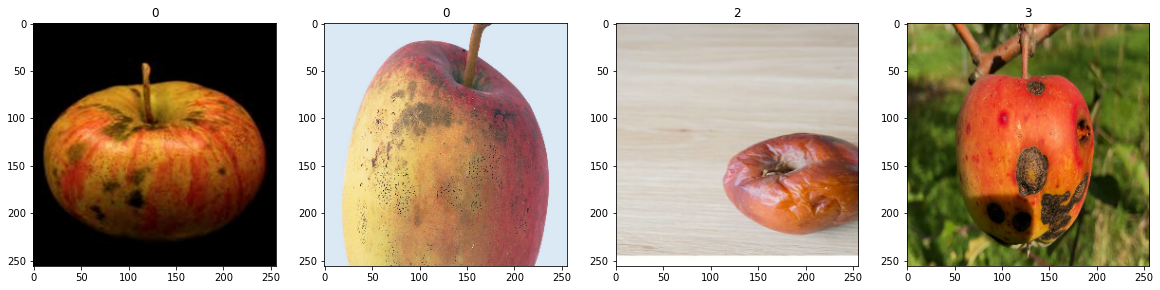

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

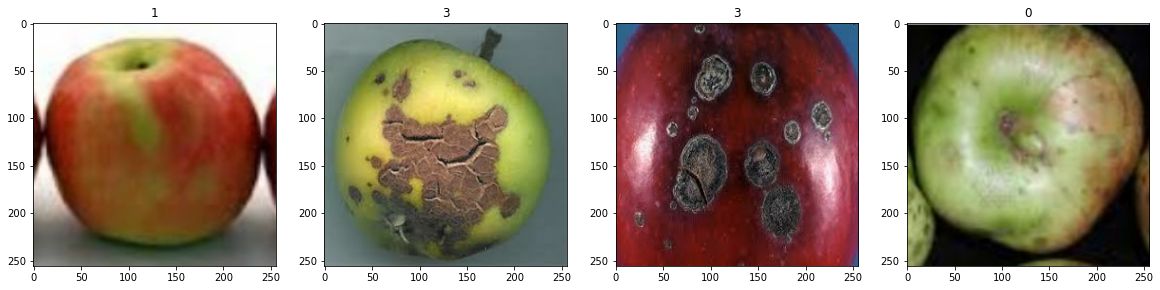

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])

# 4. Scale Data

In [19]:
train_data = train_data.map(lambda x,y: (x/255, y))

In [20]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [21]:
train_data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [22]:
test_data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

# 5. Split Data

In [23]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
test_size = int(len(test_data))

In [25]:
train_size

9

In [26]:
val_size

2

In [27]:
test_size

4

In [32]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# 6. Build Deep Learning Model

In [33]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras

In [35]:
model = Sequential()

In [48]:
# Define a simple sequential model
num_classes = 4
# lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
# nrOfEpochs = 5
img_height = 256
img_width = 256
image_size=(img_height, img_width)
batch_size = 32


def create_model():
  model = tf.keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 32)       

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [38]:
logdir='logs'

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 8s 750ms/step - loss: 1.3824 - sparse_categorical_accuracy: 0.2396 - val_loss: 1.3566 - val_sparse_categorical_accuracy: 0.3281
Epoch 2/20
9/9 [==============================] - 7s 744ms/step - loss: 1.3686 - sparse_categorical_accuracy: 0.3403 - val_loss: 1.3502 - val_sparse_categorical_accuracy: 0.3125
Epoch 3/20
9/9 [==============================] - 7s 734ms/step - loss: 1.3660 - sparse_categorical_accuracy: 0.3229 - val_loss: 1.3464 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/20
9/9 [==============================] - 7s 737ms/step - loss: 1.3682 - sparse_categorical_accuracy: 0.3125 - val_loss: 1.3618 - val_sparse_categorical_accuracy: 0.3281
Epoch 5/20
9/9 [==============================] - 7s 732ms/step - loss: 1.3719 - sparse_categorical_accuracy: 0.3229 - val_loss: 1.3522 - val_sparse_categorical_accuracy: 0.3438
Epoch 6/20
9/9 [==============================] - 7s 736ms/step - loss: 1.3643 - sparse_categorical_accuracy: 

# 8. Plot Performance

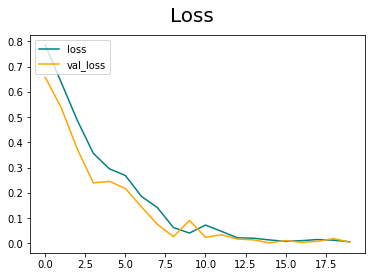

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

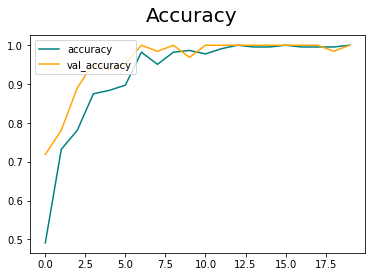

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [50]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [51]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
len(test)

4

test_iterator = test_data.as_numpy_iterator()
test_batch = test_iterator.next()

In [81]:
for test_batch in test_data.as_numpy_iterator(): 
    X, y = test_batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

InvalidArgumentError: predictions must be >= 0
Condition x >= y did not hold.
First 3 elements of x:
[ 2.2966404  -1.5881332  -0.60630167]
First 1 elements of y:
[0.]

In [53]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [54]:
import cv2

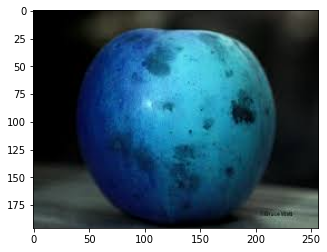

In [60]:
img = cv2.imread('data/Train/Blotch_Apple/blotch_10.jpg')
plt.imshow(img)
plt.show()

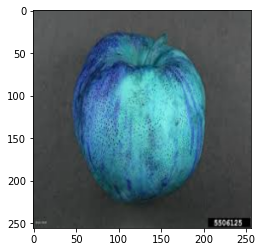

In [56]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [82]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [83]:
yhat

array([[ 2.6058912, -1.2922623, -1.1863089,  1.5726272]], dtype=float32)

In [84]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)